<a href="https://colab.research.google.com/github/nadakhatib/Third-Practical-Assignment-Data-Science-/blob/main/Third_Practical_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Iris.csv to Iris.csv
Columns: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Numeric columns: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Using X: SepalLengthCm and y: PetalLengthCm


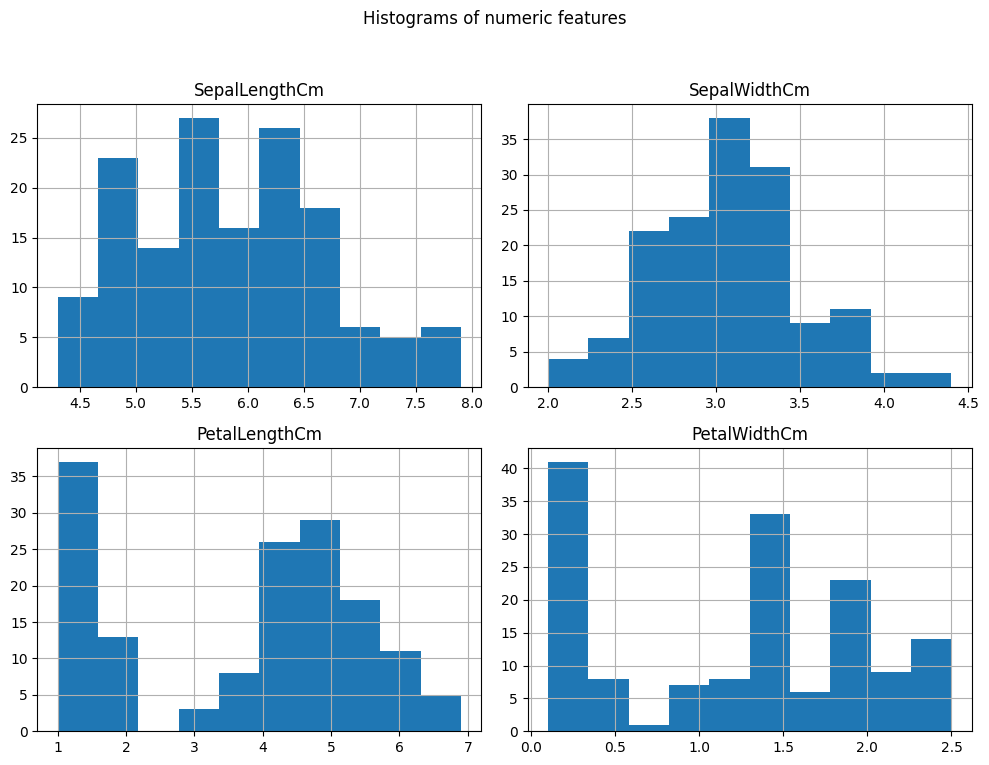

Model coef=1.8328, intercept=-6.9198
MSE: 0.5965145177566363 RMSE: 0.7723435231531603 R2: 0.8179909257095002


<Figure size 640x480 with 0 Axes>

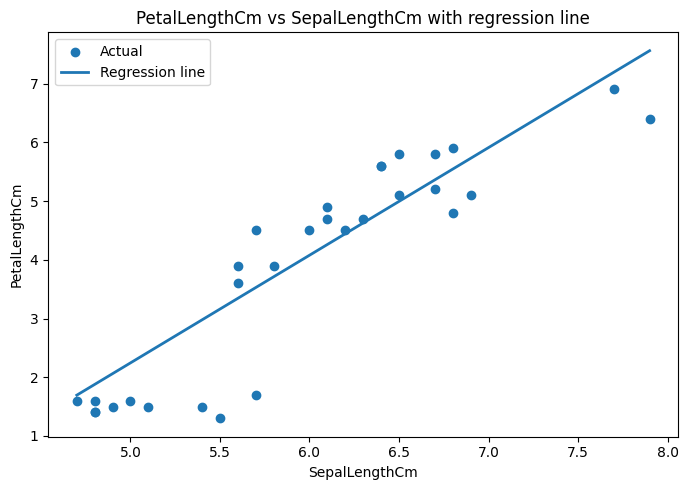

✅ Plots saved in 'images/' and results in 'results/'


<Figure size 640x480 with 0 Axes>

In [1]:
# -----------------------------------------
# Iris Linear Regression
# -----------------------------------------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1) Create folders to save images and results
os.makedirs('images', exist_ok=True)
os.makedirs('results', exist_ok=True)

# 2) Upload Iris.csv file from local machine
from google.colab import files
uploaded = files.upload()  # Select Iris.csv file

# 3) Load the dataset
df = pd.read_csv('Iris.csv')
print("Columns:", df.columns.tolist())
print(df.head())

# 4) Drop 'Id' column if it exists
for id_name in ['Id','id','ID']:
    if id_name in df.columns:
        df = df.drop(columns=[id_name])
        break

# 5) Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)

# 6) Choose features and target for regression
if 'SepalLengthCm' in df.columns and 'PetalLengthCm' in df.columns:
    X_col = 'SepalLengthCm'
    y_col = 'PetalLengthCm'
else:
    X_col, y_col = numeric_cols[0], numeric_cols[1]

print("Using X:", X_col, "and y:", y_col)

# 7) Plot histograms for all numeric columns
df[numeric_cols].hist(figsize=(10,8))
plt.suptitle('Histograms of numeric features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('images/07_histograms.png', dpi=150)
plt.show()
plt.clf()

# 8) Prepare data for regression
X = df[[X_col]].values
y = df[y_col].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9) Train Simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
coef = model.coef_[0]
intercept = model.intercept_
print(f"Model coef={coef:.4f}, intercept={intercept:.4f}")

# Save model information
with open('results/model_info.txt', 'w') as f:
    f.write(f"Feature: {X_col}\nTarget: {y_col}\ncoef={coef}\nintercept={intercept}\n")

# 10) Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse, "RMSE:", rmse, "R2:", r2)

with open('results/evaluation.txt', 'w') as f:
    f.write(f"MSE={mse}\nRMSE={rmse}\nR2={r2}\n")

# 11) Save predictions to CSV
pred_df = pd.DataFrame({
    X_col: X_test.flatten(),
    y_col + '_actual': y_test,
    y_col + '_predicted': y_pred
})
pred_df.to_csv('results/predictions.csv', index=False)

# 12) Plot scatter plot with regression line
plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, label='Actual')
xx = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1,1)
yy = model.predict(xx)
plt.plot(xx, yy, linewidth=2, label='Regression line')
plt.xlabel(X_col)
plt.ylabel(y_col)
plt.title(f'{y_col} vs {X_col} with regression line')
plt.legend()
plt.tight_layout()
plt.savefig('images/06_scatter_regression.png', dpi=150)
plt.show()
plt.clf()

print("Plots saved in 'images/' and results in 'results/'")
